In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")


In [6]:
trader_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
trader_df.info()
sentiment_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [13]:
sentiment_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [16]:
trader_df.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [17]:

sentiment_df.isna().sum()

,0
timestamp,0
value,0
classification,0
date,0


**Initial Data Inspection**

1]The trader dataset contains around 200k records of individual trades, including details such as price, trade size, leverage, and final profit or loss.  
2]The market sentiment dataset shows the daily sentiment of the Bitcoin market, labeled as Fear or Greed.  
3]Most important columns do not have missing values, which means the data quality is good for analysis.  
Since trading data is time-based and sentiment data is daily, the data will need to be aligned using dates before analysis.


In [19]:
trader_df['Timestamp IST'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)
trader_df['date'] = trader_df['Timestamp IST'].dt.date


In [20]:
trader_df[['Timestamp IST', 'date']].head()


,Timestamp IST,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [23]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
sentiment_df[['date', 'classification']].head()



,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


**Date Processing (Continued)**

The date column in the sentiment dataset was converted into a datetime format to ensure consistency with the trader data before merging.


In [24]:
merged_df = trader_df.merge(
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)


In [25]:
merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [26]:
merged_df['classification'].isna().mean()


np.float64(2.840586297011703e-05)

**Data Merging**

The trader data was merged with the market sentiment data using the trade date as the common key.  
A left join was used to ensure that all trades were retained, even if sentiment data was unavailable for certain dates.


In [27]:
merged_df.groupby('classification')['Closed PnL'].mean()


,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


In [28]:
merged_df.groupby('classification')['Closed PnL'].median()


,Closed PnL
classification,
Extreme Fear,0.0
Extreme Greed,0.0
Fear,0.0
Greed,0.0
Neutral,0.0


**Profitability Analysis**

The average profit per trade is higher during Greed and Extreme Greed periods compared to Fear and Extreme Fear.  
This suggests that traders generally perform better when market sentiment is positive.  

However, the median profit is zero across all sentiment categories, which indicates that most trades are small or break-even, and overall profitability is driven by a smaller number of profitable trades.


In [29]:
merged_df['win'] = merged_df['Closed PnL'] > 0


In [30]:
merged_df.groupby('classification')['win'].mean()


,win
classification,
Extreme Fear,0.370607
Extreme Greed,0.464943
Fear,0.420768
Greed,0.384828
Neutral,0.396991


**Win Rate Analysis**

Win rate was calculated as the percentage of trades with positive profit or loss under each market sentiment.  
This helps understand whether traders are more consistently profitable during Fear or Greed conditions.


In [34]:
merged_df.groupby('classification')['Size USD'].mean()


,Size USD
classification,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


The average trade size was compared across different market sentiment categories to understand whether traders take larger positions during Greed periods compared to Fear periods.


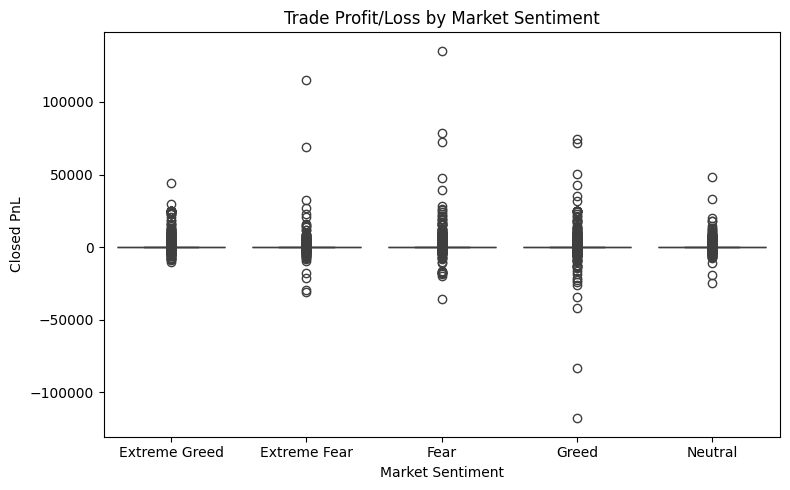

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title('Trade Profit/Loss by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.tight_layout()


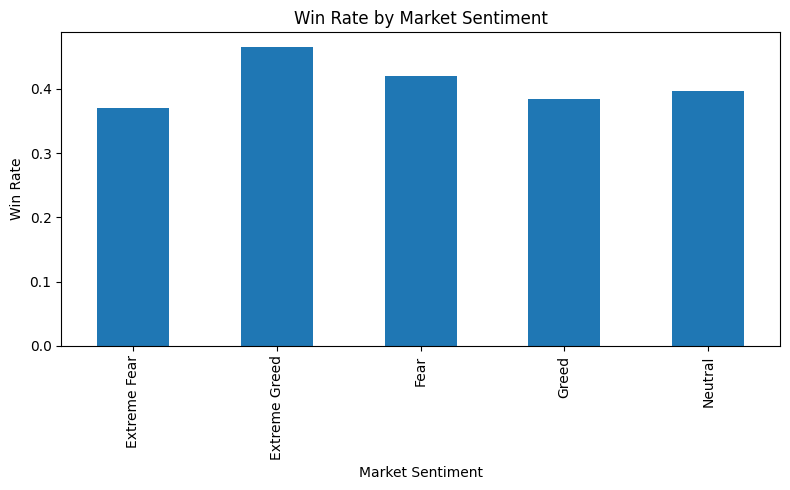

In [36]:
win_rate = merged_df.groupby('classification')['win'].mean()

win_rate.plot(kind='bar', figsize=(8, 5))
plt.title('Win Rate by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Win Rate')
plt.tight_layout()


**Visual Analysis**

The boxplot shows how profit and loss distributions vary across different market sentiment categories.  
The win rate bar chart highlights differences in the consistency of profitable trades under Fear and Greed conditions.


In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title('Trade Profit/Loss by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.savefig('pnl_vs_sentiment.png')
plt.close()


In [38]:
win_rate = merged_df.groupby('classification')['win'].mean()

plt.figure(figsize=(8, 5))
win_rate.plot(kind='bar')
plt.title('Win Rate by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Win Rate')
plt.tight_layout()
plt.savefig('win_rate_vs_sentiment.png')
plt.close()


**Key Insights & Observations**

Trades executed during Greed and Extreme Greed periods show higher average profitability compared to Fear periods.
The median profit remains close to zero across all sentiment categories, indicating that most trades are small or break-even, while overall profitability is driven by fewer high-impact trades.
Win rates are generally higher during positive sentiment phases, suggesting better consistency in trader performance when market sentiment is optimistic.
Trade size analysis shows that traders tend to take larger positions during Greed periods, indicating increased risk-taking behavior.
During Fear and Extreme Fear conditions, traders appear more cautious, with smaller trade sizes and lower profitability.

**Conclusion**

Market sentiment has a noticeable impact on trader behavior and performance.  
Positive sentiment environments encourage higher risk-taking and offer better profit opportunities, while negative sentiment leads to more conservative trading behavior.
